# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Чтобы ответить на данный вопрос произведем группировку данных по двум столбцам: 'children' и 'debt'.
Выведем результат на экран. Для удобства умножим на 100 и получим процент клиентов с просрочкой по кредиту. 

In [22]:
display(data.groupby('children')['children'].count())

display(data.groupby('children')['debt'].mean()*100)

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

Как видно из полученных данных наиболее преобладающая категория клиентов банка - это люди без детей. (14 091 чел.)
Далее категория клиентов с одним ребенком. (4 808 чел.)
Третья категория клиенты с двумя детьми (2 052 чел.)

Людей с более чем двумя детьми можно не учитывать в расчётах (так как разница между наибольшим и наименьшим значениями в группах будет значительно отличаться, а именно: клиенты без детей - 14 081 чел, а с пятью детьми - всего 9 чел. 

Посмотроим столбчатую диаграмму.

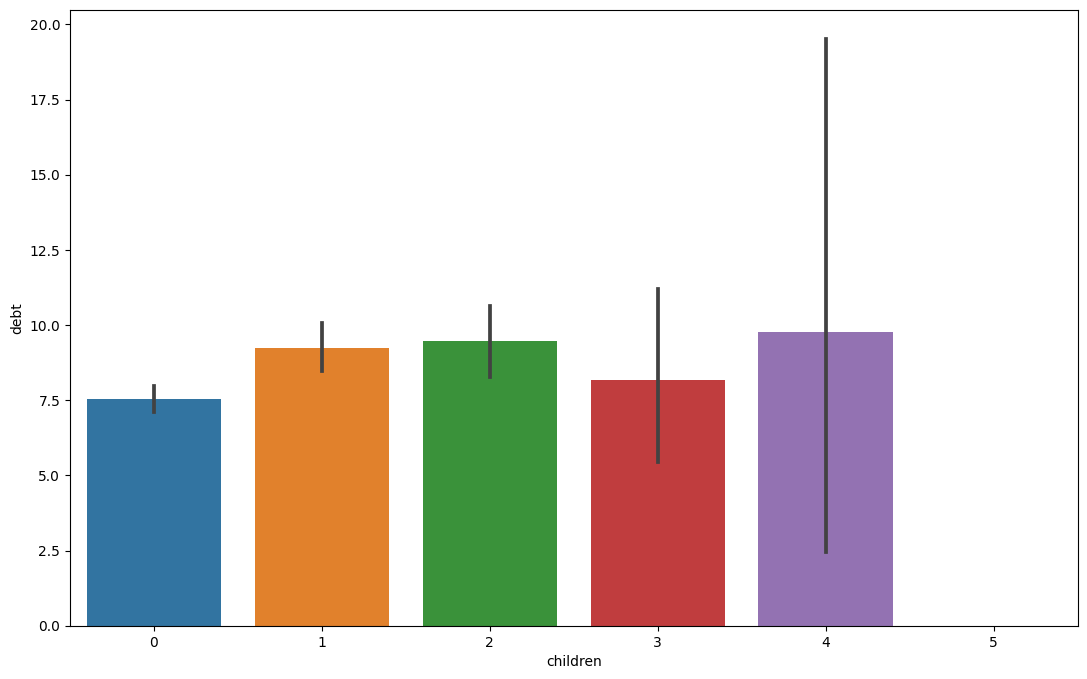

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['children'],y=data['debt']*100)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

**Вывод:** 

1) У клиентов без детей (14091 человек) процент людей с задолженностью по кредиту составляет 7,54%

2) У клиентов с 1 ребёнком (4808 человек) процент людей с задолженностью по кредиту составляет 9,23%

3) У клиентов с 2 детьми (2052 человека) процент людей с задолженностью по кредиту составляет 9,45%

Учитывая данные факты, можно предположить, что наиболее благонадежными заемщиками для банка будут клиенты без детей(также стоит учитывать,что это наиболее многочисленная группа)

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для ответа на данный вопрос, сгруппируем данные по двум столбцам: family_status и debt.
Сразу выведем результат на экран. Для удобства умножим на 100 и получим процент клиентов с просрочкой по кредиту. 

In [24]:
display (data.groupby('family_status')['debt'].count())
display (data.groupby('family_status')['debt'].mean()*100)

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64

family_status
Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.313014
женат / замужем          7.560558
Name: debt, dtype: float64

Для наглядности отобразим полученные результаты с помощью столбчатой диаграммы. 

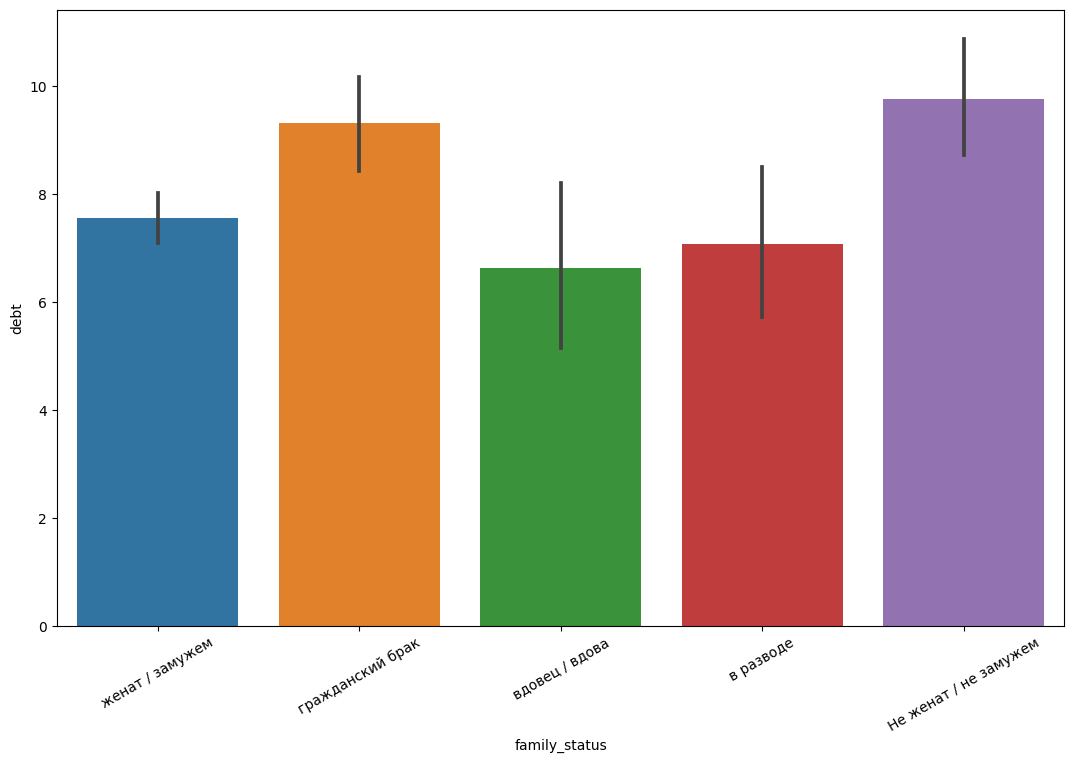

In [30]:
import seaborn as sns

plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['family_status'],y=data['debt']*100)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

**Вывод:** 

Процент заемщиков с задолженностью по кредиту выше у следующих категорий: 

1) Не женат / не замужем    9.76 %

2) гражданский брак         9.31 %

И ниже у следующих категорий: 

1) женат / замужем 7.56 % (Наиболее многичесленная группа)
2) в разводе 7.06 % 
3) вдовец / вдова 6.62 % 

Наименьшее количество клиентов с просрочкой по кредиту в категории - вдовец / вдова 6.62 %. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Посчитаем количество клиентов в зависимости от категории дохода, которую мы определили ранее с помощью функции 
total_income_category. Для этого произведем группировку по столбцу total_income_category.
Произведем подсчёт клиентов с просроченной задолженостью по кредиту и переведем значение в проценты. 

In [26]:
display(data.groupby('total_income_category')['total_income_category'].count())

display(data.groupby('total_income_category')['debt'].mean()*100)

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: total_income_category, dtype: int64

total_income_category
A    8.000000
B    7.060231
C    8.498210
D    6.017192
E    9.090909
Name: debt, dtype: float64

Сначала посмотрим количественные значения клиентов в каждой группе по уровню дохода.

Самая многочисленная категория - C (15 921 человек). Это люди с доходом от 50 001 до 200 000.

На втором месте категория - B (5014 человек). Люди с доходом от 200 000 до 1 000 000.
Группа с самым большим расхождением по уровню дохода.

Наименее значимые группы для анализа - это группы А (25 человек) и E (22 человека)
Клиенты с самым высоким и самым низким доходом.

Категории распределились следующим образом: 

1) Категория Е (Доход от 0 до 30 000) 9,09% имели задолженность по возврату кредита.

2) Категория С (Доход от 50 001 до 200 000) 8,49% имели задолженность по возврату кредита.

3) Категория А (Доход от 1 000 001) 8.00% имели задолженность по возврату кредита.

4) Категория B (Доход от 200 001 до 1 000 000) 7,06% имели задолженность по возврату кредита.

5) Категория D (Доход от 30 000 до 50 000) 6,01% имели задолженность по возврату кредита.

Для наглядности отобразим полученные данные на графике.

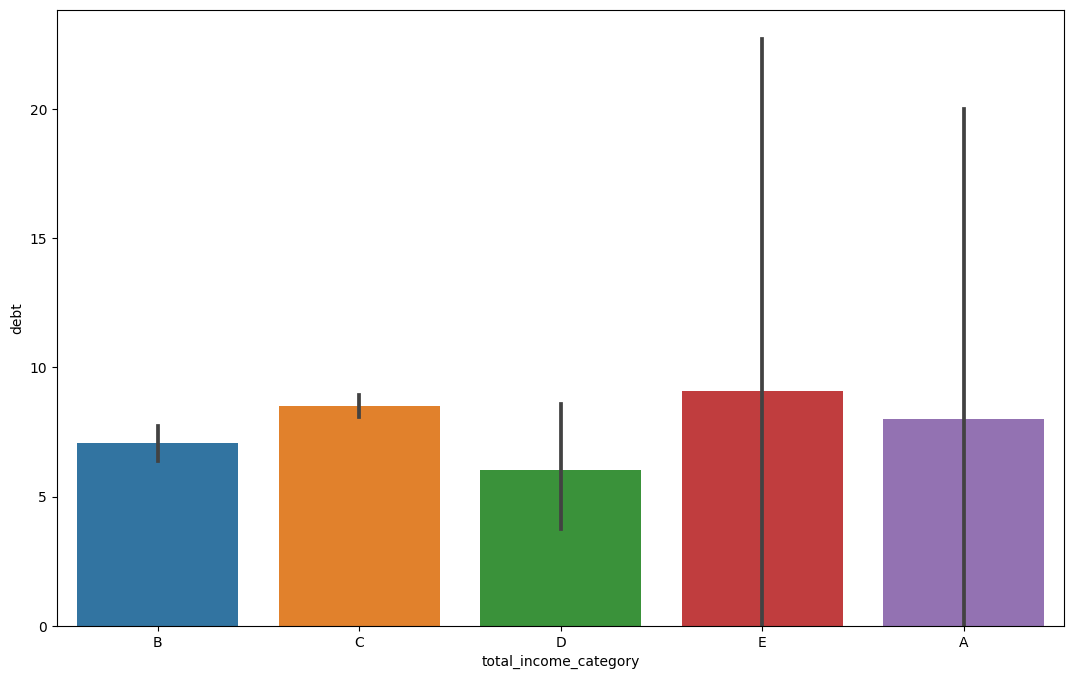

In [31]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['total_income_category'],y=data['debt']*100)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

**Вывод:** 

На основании полученных данных можно сделать следующие выводы:

1) Если мы учитываем абсолютные значения (не ориентируемся на количество человек в каждой группе), то наибольший риск возникновения задолженности у людей с самым низким уровнем дохода(Категория Е). А наиболее благонадежная категория - D. 

2) Если ориентироваться на самые большие группы , то это группы С и B (15 921 человек и 5014 человек соответственно). Какую-то конкретную закономерность определить нельзя, особенно учитывая тот факт, что в категории B слишком большое расхождение по уровню дохода (от 200 001 до 1 000 000). 

3) Вероятно рост благосостояния человека не слишком влияет на вероятность возникновения задолженности по кредиту. Возможно на это влияют другие факторы. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Посчитаем количество клиентов в зависимости от цели кредита, которую определили ранее с помощью функции 'purpose_category'.
Произведем группировку по столбцу 'purpose_category'. 
Далее расчитаем процент клиентов с просрочкой в зависимости от цели кредита. 

In [28]:
display(data.groupby('purpose_category')['debt'].count())

display(data.groupby('purpose_category')['debt'].mean()*100)

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64

purpose_category
операции с автомобилем      9.347978
операции с недвижимостью    7.255139
получение образования       9.252758
проведение свадьбы          7.911803
Name: debt, dtype: float64

Самая популярная цель получения кредита - операции с недвижимостью, таких клиентов у банка 10 751 человек. 
Далее операции с автомобилем - 4279 человек, получение образования - 3988 человек, проведение свадьбы - 2313 человек.

Процент просрочки по кредитам распределился следующим образом:

1) операции с автомобилем  9,34%

2) получение образования 9,25%

3) проведение свадьбы 7,91%

4) операции с недвижимостью 7,25%

Для наглядности посмотрим график.

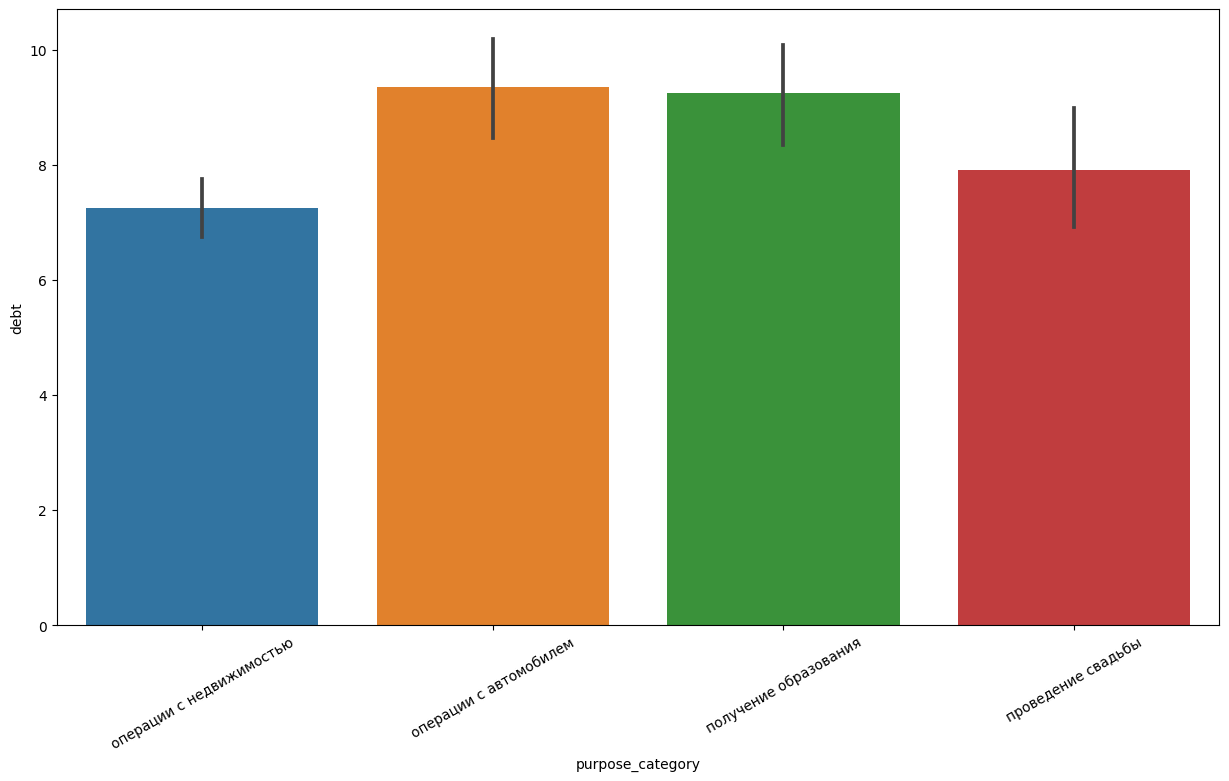

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.barplot(x=data['purpose_category'],y=data['debt']*100)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

**Вывод:** 

Наименьший процент задолженности у кредитов связанных с недвижимостью. Вероятно здесь имеют место 'кредиты под залог недвижимости'(большинство заемщиков боятся потерять объект недвижимости и стараются недопустить просрочки по кредиту)
Также следует учитывать тот факт,что это наиболее многочисленная группа. 

Интересно,что цели кредита 'покупка автомобиля' и 'получение образования' имеют практически одинаковый процент по задолженности среди заемщиков (9,34% и 9,25%) и не слишком большую разницу в количестве человек в данных группах (4279 и 3988).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Существуют различные причины появления пропусков в исходным данных.

Человеческий фактор(неправильный ввод(ошибки), неправильная выгрузка данных). Также стоит учитывать, тот факт, что люди могут неохотно оставлять свои личные данные(например: e-mail,номер телефона). 

Также причинами появления пропусков в данных могут быть проблемы технического характера(падение серверов, сбой в работе ПО).

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Медианное значение более приближенно к реальным данным, т.к среднеарифтическое не всегда отражает реальную картину происходящего, особенно при слишком большой разнице в значениях. (например заемщиков с уровнем дохода
более 1 000 001 всего 25 человека ,а с доходом 50 001 до 200 000 - 15 921 человек)

# Общий вывод по проекту

### Шаг 4: общий вывод.

Целью данного проекта было проанализировать и найти взаимосвязь(выявить закономерность) между несколькими факторами. 

```1) Есть ли зависимость между количеством детей и возвратом кредита в срок?```

На основе полученных данных можно сделать вывод, что наиболее благонадежными заемщиками для банка будут клиенты без детей (самая многочисленная группа из всех клиентов банка)

Логично предположить, что наличие детей увеличивает финансовую нагрузку на заемщика (не зря банки при выдаче кредита учитывают количество 'иждивенцев' у потенциального кредитополучателя). Данный факт подкрепляется цифрами.

Процент клиентов с задолженностью:

1) без детей - 7, 54 %

2) с 1 ребёнком - 9,23 %

3) с 2 детьми - 9,45 %




```2) Есть ли зависимость между семейным положением и возвратом кредита в срок?```

Анализ данных позволил выявить закономерность, что категория клиентов с официально зарегистрированным браком имеет меньший процент с задолженностью по кредиту, нежели другие категории клиентов. Также клиенты могут зачастую быть созаемщиками, что будет являться для банка дополнительной страховкой в случае прекращения платежей по кредиту. 

Данные факты подкреплены следующими значениями (процент клиентов с просроченной задолженностью по кредиту):

1) женат / замужем 7.56 % (Наиболее многочисленная группа)
2) гражданский брак 9.31 %
3) не женат / не замужем 9.76 %


```3) Есть ли зависимость между уровнем дохода и возвратом кредита в срок?```

В данном проекте конкретную взаимосвязь установить не удалось. 
Рекомендуется пересмотреть подход к определению категории клиентов по уровню дохода, а именно:

Группа B (5014 человек) - слишком большой 'разбег' в доходах (от 200 001 до 1 000 000). Возможно, имеет смысл произвести сегментацию (например, от 200 000 до 500 000 и от 500 001 до 1 000 000). 

Также стоит обратить внимание на самую многочисленную группу С (15 921 человек), у которых уровень дохода от 50 001 до 200 000.
Возможно, если пересмотреть градацию по доходу клиентов, то 'картина' будет совсем иной, например: от 50 001 до 100 000 
и от 100 001 до 200 000). 

На основе полученных данных мы видим, что рост уровня дохода не влияет положительным образом на возврат кредита в срок.


```4) Как разные цели кредита влияют на его возврат в срок?```

Наименьший процент задолженности у кредитов, связанных с недвижимостью. Вероятно, здесь имеют место 'кредиты под залог недвижимости'(большинство заемщиков боится потерять объект недвижимости и старается не допустить просрочки по кредиту).
Также следует учитывать тот факт, что это наиболее многочисленная группа. 

Процент клиентов с 'просрочкой' кредитов в категории 'операции с недвижимостью' составляет 7.25 %. 






Учитывая ответы на предыдущие вопросы, можно попробовать составить картину наиболее надежного заемщика для банка.

Это человек с официально зарегистрированным браком, без детей, цель кредита - приобретение недвижимости. 


Также банку стоит более тщательно проверять лиц, подающих заявку на кредит, при наличии следующих критериев: официально незарегистрированный брак, наличие детей, цель кредита, отличная от операций с недвижимостью. 